![](https://ujwlkarn.files.wordpress.com/2016/08/8-gif.gif?w=192&h=192&zoom=2)

### Свертки

Допустим у нас есть такая матрица

![](https://ujwlkarn.files.wordpress.com/2016/07/screen-shot-2016-07-24-at-11-25-13-pm.png?w=254&h=230)

Представим что она обозначает изображение. В обычном изображении значения пикселей не 0/1, но это учебный вариант

Назовем вот эту матрицу 3х3 фильтром.

![](https://ujwlkarn.files.wordpress.com/2016/07/screen-shot-2016-07-24-at-11-25-24-pm.png?w=148&h=128)

После этого, сама процедура свертки будет выглядеть вот так

![](https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif?w=268&h=196&zoom=2)


От того какие значения в фильтре, мы можем получить разный результат

Например для этой картинки

![](https://ujwlkarn.files.wordpress.com/2016/08/111.png?w=134&h=132)

Для разных фильтров будут проявляться разные осоебнности 

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-05-at-11-03-00-pm.png)

Мы можем использовать несколько разных фильтров и в результате получить такой многомерный вектор

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-3-42-35-am.png?w=802&h=402)


Здесь также используются функции активации, например ReLU

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-6-18-19-pm.png?w=748)

#### Важно

Часто используется слой MaxPooling
![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-3-38-39-am.png?w=988)

Он позволяет уменьшить размерность получившегося вектора, но оставляет самую важную информацию

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-6-19-37-pm.png?w=401&h=219)

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-6-11-53-pm.png)

Теперь можем представить вот такую сеть

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-08-at-2-26-09-am.png?w=1496)

В конечном итоге получится что-то типа такого

![](https://ujwlkarn.files.wordpress.com/2016/08/car.png?w=1212)

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-12-58-30-pm.png?w=484&h=510)

Ну а мы продолжим работать с MNIST. 

![](https://ujwlkarn.files.wordpress.com/2016/08/conv_all.png?w=1496)

Но не обычным, а модным

![](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

![](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/embedding.gif)

In [1]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [29]:
train_loader = DataLoader(
    datasets.FashionMNIST('./fashion', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
#                        transforms.Normalize(0, 1)
                   ])),
    batch_size=32, shuffle=True)

In [30]:
test_loader = DataLoader(
    datasets.FashionMNIST('./fashion', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
#                        transforms.Normalize((0), (1))
                   ])),
    batch_size=32, shuffle=True)


In [31]:
example_batch = next(iter(test_loader))
example_batch

[
 (0 ,0 ,.,.) = 
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
            ...             ⋱             ...          
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
      ⋮ 
 
 (1 ,0 ,.,.) = 
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
            ...             ⋱             ...          
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
      ⋮ 
 
 (2 ,0 ,.,.) = 
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
   0.0000  0.0000  0.0000  ...  

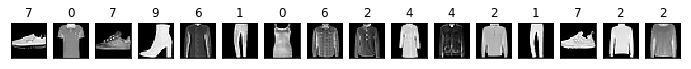

In [32]:
image_size = 28
show_image_n = 16

fig = plt.figure(figsize=(12, 1))
for i in range(1, show_image_n + 1):
    ax = fig.add_subplot(1, show_image_n, i)
    
    ax.set_title(f'{example_batch[1][i]}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax.imshow(example_batch[0][i].view(image_size, image_size), cmap="gray")


In [33]:
import torch.nn.functional as F
from torch import nn

In [34]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 10, 3)
        self.fc1 = nn.Linear(250, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        # В отличии от предыдущей сети не будем менять картинку
        # Теперь пропустим нашу картинку через сверточный слой
        x = self.conv1(x)
        # Не забыть активацию
        x = F.relu(x)
        # Теперь сделаем MaxPooling
        x = F.max_pool2d(x, 2)
        # Сделаем то же самое со второй сверткой
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        #print(x.shape)
        # Свернем все получившееся в один слой
        x = x.view(32, -1)
        # Пропустим через полносвязные
        x = self.fc1(x)
        x = F.relu(x)
        
        # Пропустим через следующий слой
        x = self.fc2(x)
        # активация
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        # Теперь мы получили вектор размера 10. Будем считать что на i месте стоит значение принадлежности i классу;
        # Чтобы это было лучше читаемо обычно из этих чисел моделируют вероятность. 
        # Для этого используют функцию Softmax. Максим напишет ее на доске
        x = F.softmax(x)
        return x

In [35]:
net = Net()

In [36]:
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 10, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=250, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [37]:
criterion = nn.CrossEntropyLoss()

In [38]:
from torch import optim

In [39]:
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.6)

In [40]:
from tqdm import tqdm_notebook
from IPython.display import clear_output

In [41]:
train_plot = []
test_plot = []

In [42]:
from torch.autograd import Variable

Epoch 7
Train accuracy: 0.63645
Val accuracy: 0.5


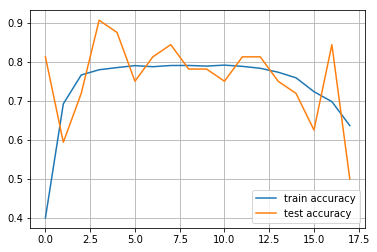

In [ ]:
for epoch in tqdm_notebook(range(10), desc='epoch'):
    # здесь мы проходим одну эпоху тренировки
    train_log = []
    for train_batch in tqdm_notebook(train_loader, desc='training'):
        # data - объекты, target - метки
        # Оборачиваем в Variable чтобы считать от них градиент
        data, target = Variable(train_batch[0]), Variable(train_batch[1])
        # обнуляем градиенты
        optimizer.zero_grad()
        # предсказываем метку для батча
        output = net(data)
        # считаем функцию потерь
        loss = criterion(output, target)
        # считаем градиент
        loss.backward()
        # меняем веса во всех слоях сети
        optimizer.step()
        # добавим accuracy и будем считать его все время чтобы рисовать график
        # Для начала посчитаем какой класс модель предсказала с максимальной уверенностью
        # Переводим все в нампай для лучшей наглядности
        model_outputs = np.argmax(output.data.numpy(), axis=1)
        targets = target.data.numpy().reshape(-1)
        train_log.extend(model_outputs == targets)
        
    train_plot.append(np.mean(train_log))
    # здесь мы будем считать ошибку на тестовой выборке, которую модель не видела
    test_log = []
    for test_batch in tqdm_notebook(test_loader, desc='testing'):
        data, target = Variable(train_batch[0]), Variable(train_batch[1])
        output = net(data)
        
        model_outputs = np.argmax(output.data.numpy(), axis=1)
        targets = target.data.numpy().reshape(-1)
       
        test_log.extend(model_outputs == targets)
        # здесь мы не трогаем градиенты
    test_plot.append(np.mean(test_log))
    clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_plot[-1])
    print("Val accuracy:", test_plot[-1])
    plt.plot(train_plot, label='train accuracy')
    plt.plot(test_plot, label='test accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()


Теперь можно сравнить свои результаты с остальными

http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/#